# Geoprocessing and Mapping

Agenda:
- continuation of python mapping and geoprocessing with geopandas
- getting centroids
- computing distances
- Processing GeoJson data from APIs



What are some example applications you might use geoprocessing operations in?

- buffering
- overlays
- distance calculations

In [2]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from scipy import ndimage
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = 10, 8

import warnings 
warnings.filterwarnings('ignore')

### First, reprocess data from previous session

In [3]:
blocks = gpd.read_file('data/geo_export_9702b0bc-dfe0-42aa-bab9-e9ca83abd50f.shp')

print(type(blocks))
print(blocks.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
  countyfp10    intptlon10 blockce10 tractce10   intptlat10      name10  \
0        001  -122.2564001      2005    422500  +37.8760481  Block 2005   
1        001  -122.2630010      3001    422800  +37.8677659  Block 3001   
2        001  -122.2638664      3008    422800  +37.8658164  Block 3008   
3        001  -122.2636773      3009    423602  +37.8621680  Block 3009   
4        001  -122.2602461      2000    422800  +37.8681223  Block 2000   

           geoid10  aland10  awater10 mtfcc10 statefp10  \
0  060014225002005  10537.0       0.0   G5040        06   
1  060014228003001  11761.0       0.0   G5040        06   
2  060014228003008  10506.0       0.0   G5040        06   
3  060014236023009  19893.0       0.0   G5040        06   
4  060014228002000  21110.0       0.0   G5040        06   

                                            geometry  
0  POLYGON ((-122.2559250023598 37.87657699839653...  
1  POLYGON ((-122.2623200015607 37.867

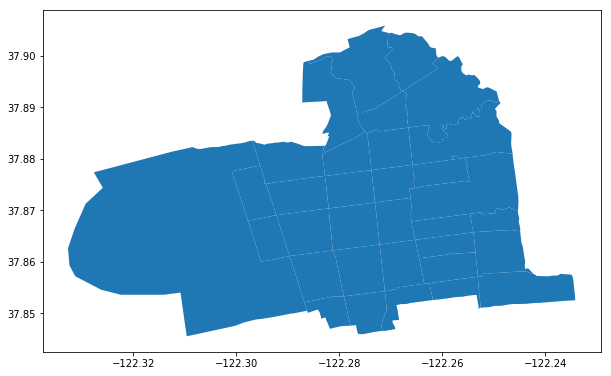

In [4]:
tracts = blocks.dissolve(by='tractce10')
tracts.plot();

In [5]:
tracts.crs = {'init' :'epsg:4326'}
# or alternatively:
tracts.crs = blocks.crs
print(tracts.crs)

{'init': 'epsg:4326'}


In [6]:
vandalism = pd.read_csv('data/311_Cases.csv').dropna()
vandalism.head()

,Case_ID,Date_Opened,Case_Status,Date_Closed,Request_Category,Request_SubCategory,Request_Detail,Object_Type,APN,Street_Address,City,State,Neighborhood,InDbDate,Latitude,Longitude,Location
3,121000245255,05/08/2015 03:46:52 PM,Closed,05/11/2015 08:07:42 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,Berkeley,CA,Berkeley,10/27/2016 04:12:43 AM,37.873666,-122.272719,"(37.873666, -122.272719)"
4,121000282834,02/04/2016 12:48:53 PM,Closed,08/22/2016 11:14:35 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,053 165802200,2827 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:14:21 AM,37.854388,-122.291846,"(37.854388, -122.291846)"
6,121000291163,04/01/2016 02:32:13 PM,Closed,04/28/2016 01:57:26 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,056 192000701,1322 CHANNING WAY,Berkeley,CA,Berkeley,10/27/2016 04:14:38 AM,37.863296,-122.285123,"(37.863296, -122.285123)"
14,121000254095,07/15/2015 04:41:04 PM,Closed,07/17/2015 12:47:16 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,058 217102600,1631 M L KING JR WAY,Berkeley,CA,Berkeley,10/27/2016 04:13:03 AM,37.876757,-122.273231,"(37.876757, -122.273231)"
17,121000197476,06/06/2014 07:08:52 AM,Closed,06/12/2014 11:59:16 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,059 232701100,1484 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:17:44 AM,37.875817,-122.299396,"(37.875817, -122.299396)"


In [7]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(vandalism.Longitude, vandalism.Latitude)]
geovandalism = GeoDataFrame(vandalism, crs=crs, geometry=geometry)
geovandalism.head()

,Case_ID,Date_Opened,Case_Status,Date_Closed,Request_Category,Request_SubCategory,Request_Detail,Object_Type,APN,Street_Address,City,State,Neighborhood,InDbDate,Latitude,Longitude,Location,geometry
3,121000245255,05/08/2015 03:46:52 PM,Closed,05/11/2015 08:07:42 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,Berkeley,CA,Berkeley,10/27/2016 04:12:43 AM,37.873666,-122.272719,"(37.873666, -122.272719)",POINT (-122.2727192 37.87366564)
4,121000282834,02/04/2016 12:48:53 PM,Closed,08/22/2016 11:14:35 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,053 165802200,2827 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:14:21 AM,37.854388,-122.291846,"(37.854388, -122.291846)",POINT (-122.29184559 37.85438802)
6,121000291163,04/01/2016 02:32:13 PM,Closed,04/28/2016 01:57:26 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,056 192000701,1322 CHANNING WAY,Berkeley,CA,Berkeley,10/27/2016 04:14:38 AM,37.863296,-122.285123,"(37.863296, -122.285123)",POINT (-122.28512347 37.86329594)
14,121000254095,07/15/2015 04:41:04 PM,Closed,07/17/2015 12:47:16 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,058 217102600,1631 M L KING JR WAY,Berkeley,CA,Berkeley,10/27/2016 04:13:03 AM,37.876757,-122.273231,"(37.876757, -122.273231)",POINT (-122.27323113 37.87675705)
17,121000197476,06/06/2014 07:08:52 AM,Closed,06/12/2014 11:59:16 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,059 232701100,1484 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:17:44 AM,37.875817,-122.299396,"(37.875817, -122.299396)",POINT (-122.29939598 37.87581733)


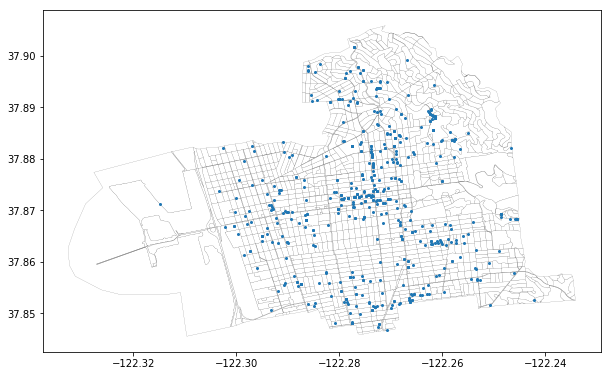

In [8]:
base = blocks.plot(color='white', edgecolor='black', linewidth=.1)
geovandalism.plot(ax=base, markersize=4);

In [9]:
# http://spatialreference.org/ref/sr-org/6787/
mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
geovandalism_proj = geovandalism.to_crs(mtc_crs)
blocks_proj = blocks.to_crs(mtc_crs)
tracts_proj = tracts.to_crs(mtc_crs)
tracts_proj.crs

'+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '

In [10]:
# If you get an error in the cell below this one, uncomment the pip install line here and run it
#!pip install rtree

In [11]:
geovandalism_proj_blocks = gpd.sjoin(geovandalism_proj, blocks_proj, how="inner", op='intersects')
geovandalism_proj_blocks.head()

,Case_ID,Date_Opened,Case_Status,Date_Closed,Request_Category,Request_SubCategory,Request_Detail,Object_Type,APN,Street_Address,...,intptlon10,blockce10,tractce10,intptlat10,name10,geoid10,aland10,awater10,mtfcc10,statefp10
3,121000245255,05/08/2015 03:46:52 PM,Closed,05/11/2015 08:07:42 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
576,121000245291,05/11/2015 08:06:20 AM,Closed,05/27/2015 03:07:12 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Traffic Maintenance,Property,057 205701202,1901 HEARST AVE,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
1137,121000308818,08/07/2016 10:28:57 AM,Closed,08/24/2016 08:20:27 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
1159,121000209814,08/26/2014 03:46:38 PM,Closed,08/28/2014 07:10:24 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205700100,1801 M L KING JR WAY,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
4,121000282834,02/04/2016 12:48:53 PM,Closed,08/22/2016 11:14:35 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,053 165802200,2827 SEVENTH ST,...,-122.2916534,1077,422000,+37.8545176,Block 1077,060014220001077,20096.0,0.0,G5040,06


In [12]:
tract_v = geovandalism_proj_blocks.groupby('tractce10')['Case_ID'].count().to_frame(name='total_vandalism').reset_index()
tract_v.head()

,tractce10,total_vandalism
0,421100,1
1,421200,33
2,421300,26
3,421400,11
4,421500,33


In [13]:
tracts2 = pd.merge(tracts,tract_v, left_index=True, right_on='tractce10')
tracts2.head()

,geometry,countyfp10,intptlon10,blockce10,intptlat10,name10,geoid10,aland10,awater10,mtfcc10,statefp10,tractce10,total_vandalism
0,POLYGON ((-122.2656260011422 37.89447000181859...,001,-122.2674866,1003,+37.9027036,Block 1003,060014211001003,38637.0,0.0,G5040,06,421100,1
1,"POLYGON ((-122.272511001732 37.89024500110148,...",001,-122.2738568,2031,+37.8905923,Block 2031,060014212002031,1001.0,0.0,G5040,06,421200,33
2,POLYGON ((-122.2826779989936 37.88124899880757...,001,-122.2800289,1016,+37.8946257,Block 1016,060014213001016,22880.0,0.0,G5040,06,421300,26
3,POLYGON ((-122.2668380004826 37.88819300118777...,001,-122.2762701,2005,+37.8875182,Block 2005,060014214002005,929.0,0.0,G5040,06,421400,11
4,POLYGON ((-122.2661620001346 37.88608300110354...,001,-122.2558725,1015,+37.8963428,Block 1015,060014215001015,3894.0,0.0,G5040,06,421500,33


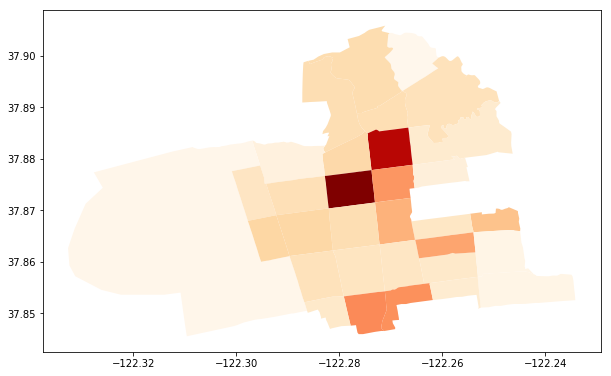

In [14]:
tracts2['van_sqmi'] = tracts2['total_vandalism']/tracts2.area/27878400
tracts2.plot(column='van_sqmi', cmap='OrRd')

In [15]:
bart = gpd.read_file('data/BART_Sta_13.shp')
bart.head()

,STATION,OPERATOR,DIST,CO,geometry
0,NORTH BERKELEY,BART,4,ALA,POINT (-122.283347881478 37.87406119520771)
1,DOWNTOWN BERKELEY,BART,4,ALA,POINT (-122.268249538332 37.86968943870814)
2,ASHBY,BART,4,ALA,POINT (-122.2701189608313 37.85320737930983)
3,ROCKRIDGE,BART,4,ALA,POINT (-122.2517773834424 37.84450968784791)
4,MACARTHUR,BART,4,ALA,POINT (-122.2671204422818 37.82870504871252)


In [16]:
bart_proj = bart.to_crs(blocks_proj.crs)

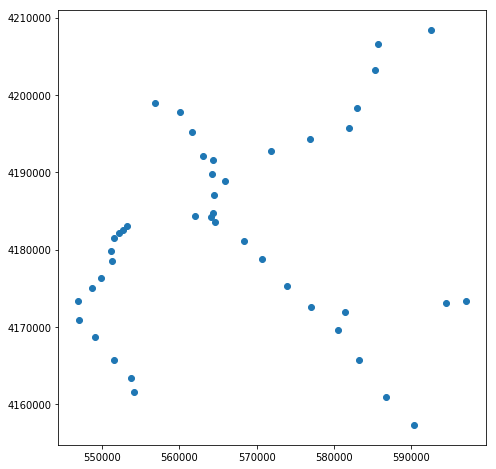

In [17]:
bart_proj.plot()

In [18]:
bart_berkeley = gpd.sjoin(bart_proj, blocks_proj, how="inner", op='intersects')
bart_berkeley

,STATION,OPERATOR,DIST,CO,geometry,index_right,countyfp10,intptlon10,blockce10,tractce10,intptlat10,name10,geoid10,aland10,awater10,mtfcc10,statefp10
0,NORTH BERKELEY,BART,4,ALA,POINT (563028.0000003229 4192083.999982029),264,001,-122.2834613,1018,422200,+37.8738420,Block 1018,060014222001018,14222.0,0.0,G5040,06
1,DOWNTOWN BERKELEY,BART,4,ALA,POINT (564359.6875347332 4191609.250012103),882,001,-122.2692393,2013,422900,+37.8697012,Block 2013,060014229002013,22107.0,0.0,G5040,06
2,ASHBY,BART,4,ALA,POINT (564209.5624836758 4189779.249962593),1167,001,-122.2702939,2003,423901,+37.8533054,Block 2003,060014239012003,29324.0,0.0,G5040,06


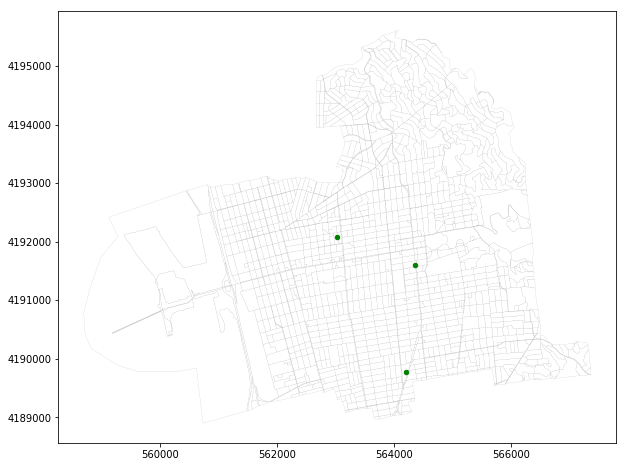

In [19]:
base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
bart_berkeley.plot(ax=base, color='green', markersize = 20);

In [20]:
bart_berkeley.crs

'+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '

OK, we're using meters so 1/2 KM gives us a buffer distance of 500 in meter units.

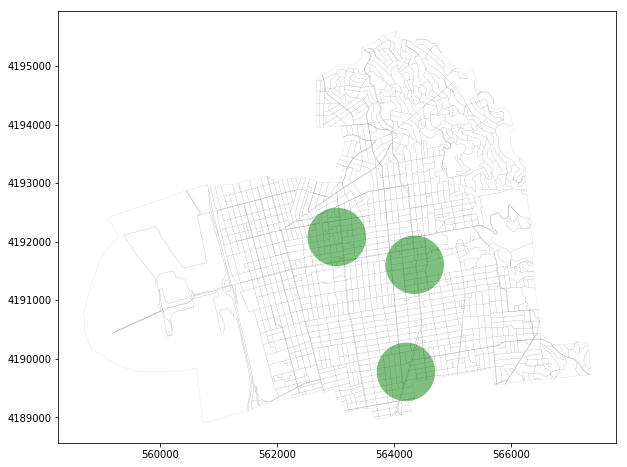

In [21]:
bart_buffer = bart_berkeley['geometry'].buffer(500)
base = blocks_proj.plot(color='none', edgecolor='gray', linewidth=.1)
bart_buffer.plot(ax=base, color='green', alpha=.5);

### Making a GeoDataFrame from a GeoSeries

Some spatial operations are easier to handle if the data are GeoDataFrames.  The buffering operation creates a GeoSeries.  Let's inspect it.

In [22]:
print(bart_buffer[0])

POLYGON ((563528.0000003229 4192083.999982029, 563525.5923636591 4192034.991411864, 563518.3926405245 4191986.454821021, 563506.470168189 4191938.857643402, 563489.9397665786 4191892.658265847, 563468.9606324971 4191848.301613616, 563443.7348064742 4191806.214865519, 563414.5052270043 4191766.803339947, 563381.5533909162 4191730.446591436, 563345.1966424048 4191697.494755348, 563305.7851168327 4191668.265175878, 563263.698368736 4191643.039349855, 563219.3417165055 4191622.060215774, 563173.1423389502 4191605.529814163, 563125.545161331 4191593.607341827, 563077.0085704877 4191586.407618693, 563028.0000003229 4191583.999982029, 562978.9914301581 4191586.407618693, 562930.4548393149 4191593.607341827, 562882.8576616957 4191605.529814163, 562836.6582841404 4191622.060215774, 562792.3016319099 4191643.039349855, 562750.2148838132 4191668.265175878, 562710.8033582411 4191697.494755348, 562674.4466097297 4191730.446591436, 562641.4947736416 4191766.803339947, 562612.2651941717 4191806.21486

Below we create a GeoDataFrame from the buffers.  We also label them.  I inferred the names from the relative coordinates.

In [23]:
bart_buffer_df = gpd.GeoDataFrame({'geometry': bart_buffer, 'bart_buffer_df':['North \n Berkeley','Downtown \n Berley','Ashby']})
print(bart_buffer_df)

       bart_buffer_df                                           geometry
0   North \n Berkeley  POLYGON ((563528.0000003229 4192083.999982029,...
1  Downtown \n Berley  POLYGON ((564859.6875347332 4191609.250012103,...
2               Ashby  POLYGON ((564709.5624836758 4189779.249962593,...


Below we assign the crs since it is already projected (you can look at the coordinates in the geometry column to verify).  The buffering operation just does not retain the crs.

In [24]:
print(bart_buffer_df.crs)

None


In [25]:
bart_buffer_df.crs = blocks_proj.crs
print(bart_buffer_df.crs)

+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


### Adding Annotation to a Map - Bart Station Names

Below we find a representative point inside each BART station buffer, and use it to position a label centered inside the buffer, with the Station Name.

In [26]:
bart_buffer_df['coords'] = bart_buffer_df['geometry'].apply(lambda x: x.representative_point().coords[:])
bart_buffer_df['coords'] = [coords[0] for coords in bart_buffer_df['coords']]
print(bart_buffer_df.columns)
print(bart_buffer_df)

Index(['bart_buffer_df', 'geometry', 'coords'], dtype='object')
       bart_buffer_df                                           geometry  \
0   North \n Berkeley  POLYGON ((563528.0000003229 4192083.999982029,...   
1  Downtown \n Berley  POLYGON ((564859.6875347332 4191609.250012103,...   
2               Ashby  POLYGON ((564709.5624836758 4189779.249962593,...   

                                    coords  
0  (563028.0000003229, 4192108.5042671114)  
1  (564359.6875347332, 4191633.7542971857)  
2  (564209.5624836758, 4189803.7542476756)  


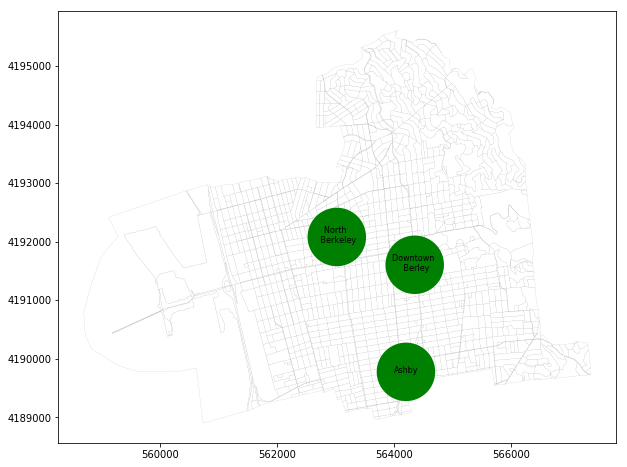

In [27]:
base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
bart_buffer.plot(ax=base, color='green', markersize = 5)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=8)

Check in time: http://bitly.com/cp255

### Spatial Overlays

Spatial joins and overlays are very similar. Joins are like merges in Pandas but with GeoDataFrames, so they result in different sets being included in the resulting merge.  Spatial joins are useful for merging point and polygon layers for example, by identifying which points fall into which polygons, and then determining what to do about these relationships based on the operation requested.  

Overlays are more general geoprocessing operations using set theory to produce a geometric result that contains different combinations of the inputs, and are particularly useful if you want to operate on two polygon sets or lines and polygons.

We woud import the relevant methods like this:

from geopandas.tools import overlay

The geopandas.tools.overlay function takes three arguments:

* df1
* df2
* how

Where how can be one of:

['intersection',
'union',
'identity',
'symmetric_difference',
'difference']

These correspond in set theory to A & B, A or B, A, Not (A or B),  A & (Not B):

| Operation    | Set Equivalent |
|--------------|----------------|
| Intersection | A & B |
| Union        | A or B |
| Identity     | A      |
| Symmetric Difference | Not (A & B) |
| Difference | A & (Not B) |

Below, courtesy of QGIS documentation, is a visual explanation of the different kinds of spatial overlay operations.


In [28]:
from IPython.core.display import Image 
Image(url="http://docs.qgis.org/testing/en/_images/overlay_operations.png")

Let's try these operations out on a modest size dataset (e.g. NOT parcels) so see them in action.

**Start with union operations.  How does the result change depending on the order of the left and right dataframe?**

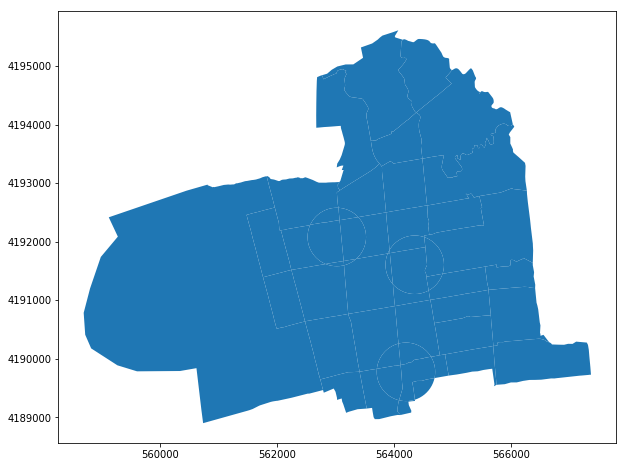

In [29]:
gpd.overlay(tracts_proj, bart_buffer_df, how='union').plot();

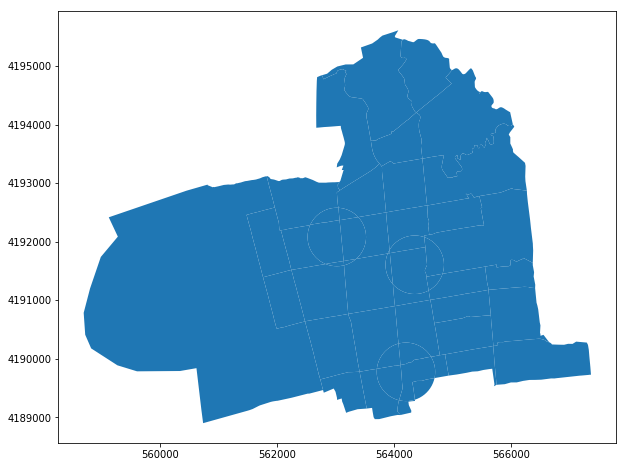

In [30]:
gpd.overlay(bart_buffer_df, tracts_proj, how='union').plot();

**OK, how about the identity operator? How does it compare to union?**

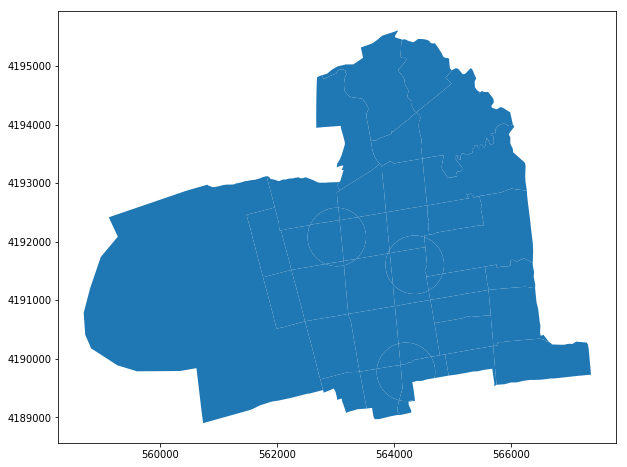

In [31]:
gpd.overlay(tracts_proj, bart_buffer_df, how='identity').plot();

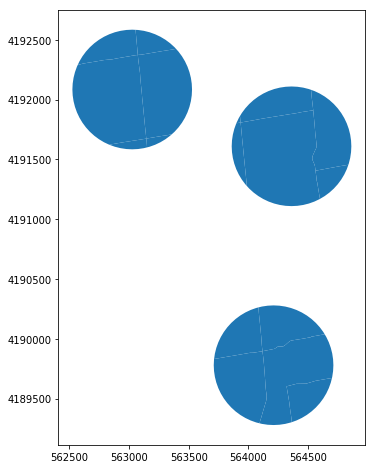

In [32]:
gpd.overlay(bart_buffer_df, tracts_proj, how='identity').plot();

** And how does that result compare to intersection?**

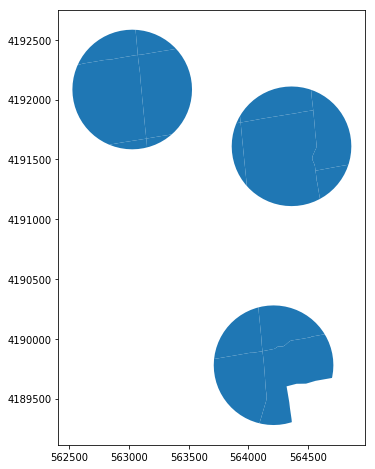

In [33]:
gpd.overlay(tracts_proj, bart_buffer_df, how='intersection').plot();

**Now compare intersection to symmetric difference.  What is the relationship?**

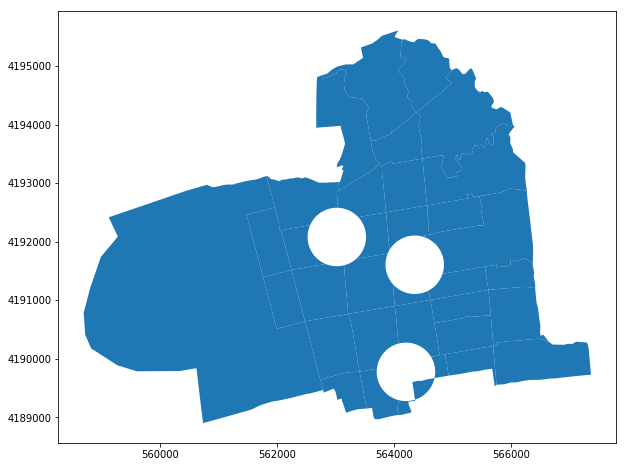

In [34]:
gpd.overlay(tracts_proj, bart_buffer_df, how='symmetric_difference').plot();

** And finally, how does that compare to the difference operator?**

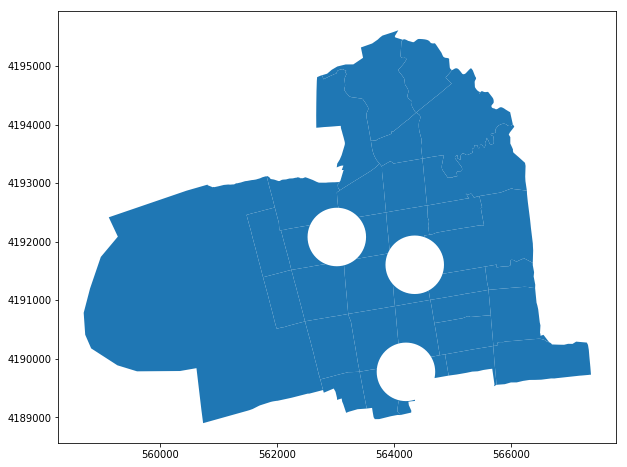

In [35]:
gpd.overlay(tracts_proj, bart_buffer_df, how='difference').plot();

### Loading Parcel Data - Larger Datasets

Now we redo a bit of the work done above, using parcels -- a common use case, but one that requires more processing.

In [36]:
parcels = gpd.read_file('data/geo_export_f6c584bc-6928-4713-8022-44eef9a6b3ef.shp')
print(parcels.head())
print(parcels.shape)
print(parcels.geometry.name)

       city state  lotsqft    zip    streetname        x_min condo  \
0  BERKELEY    CA   2925.0  94703    CALIFORNIA  563724.9312    NO   
1  BERKELEY    CA   3000.0  94703    CALIFORNIA  563758.6227    NO   
2  BERKELEY    CA   6750.0  94703  SIXTY-SECOND  563706.4447    NO   
3  BERKELEY    CA   3825.0  94703    CALIFORNIA  563721.1548    NO   
4  BERKELEY    CA   3750.0  94703  SIXTY-SECOND  563754.9907    NO   

    longitude         y_max  streetnum  \
0 -122.275596  4.188983e+06     3408.0   
1 -122.275217  4.188988e+06     3409.0   
2 -122.275786  4.189002e+06     1536.0   
3 -122.275633  4.189004e+06     3400.0   
4 -122.275250  4.189010e+06     1600.0   

                         ...                         usecd streetsufx  unit  \
0                        ...                            22         ST         
1                        ...                            11         ST         
2                        ...                            22         ST         
3         

In [37]:
parcels_proj = parcels.to_crs(blocks_proj.crs)
parcels_proj.head()

,city,state,lotsqft,zip,streetname,x_min,condo,longitude,y_max,streetnum,...,usecd,streetsufx,unit,usedscrp,shape_star,bldgarea,y_min,parcelid,x_max,geometry
0,BERKELEY,CA,2925.0,94703,CALIFORNIA,563724.9312,NO,-122.275596,4.188983e+06,3408.0,...,22,ST,,DOUBLE OR DUPLEX TYPE- 2U,274.451904,2320.0,4.188962e+06,052 143600102,563743.0167,"POLYGON ((563743.0167004069 4188964.865184802,..."
1,BERKELEY,CA,3000.0,94703,CALIFORNIA,563758.6227,NO,-122.275217,4.188988e+06,3409.0,...,11,ST,,SINGLE FAMILY RESIDENTIAL,243.980469,1678.0,4.188969e+06,052 143501200,563776.0498,"POLYGON ((563776.049800408 4188972.073784799, ..."
2,BERKELEY,CA,6750.0,94703,SIXTY-SECOND,563706.4447,NO,-122.275786,4.189002e+06,1536.0,...,22,ST,,DOUBLE OR DUPLEX TYPE- 2U,595.060059,1885.0,4.188960e+06,052 143600200,563727.8409,"POLYGON ((563724.9312004079 4188980.0040848, 5..."
3,BERKELEY,CA,3825.0,94703,CALIFORNIA,563721.1548,NO,-122.275633,4.189004e+06,3400.0,...,24,ST,,FOURPLEX OR TRIPLEX W/SFR,332.613281,2640.0,4.188980e+06,052 143600101,563739.9508,"POLYGON ((563739.9508004077 4188982.6154848, 5..."
4,BERKELEY,CA,3750.0,94703,SIXTY-SECOND,563754.9907,NO,-122.275250,4.189010e+06,1600.0,...,11,ST,,SINGLE FAMILY RESIDENTIAL,335.715088,1694.0,4.188985e+06,052 143501300,563773.4997,"POLYGON ((563773.4997004068 4188987.627584798,..."


In [38]:
print(parcels_proj.geometry.name)
print(bart_buffer_df.geometry.name)


geometry
geometry


### Doing a Spatial Join of Parcels and BART Station Buffers

In [39]:
bart_parcels = gpd.sjoin(parcels_proj, bart_buffer_df, how="inner", op='intersects')
bart_parcels.head()

,city,state,lotsqft,zip,streetname,x_min,condo,longitude,y_max,streetnum,...,usedscrp,shape_star,bldgarea,y_min,parcelid,x_max,geometry,index_right,bart_buffer_df,coords
305,BERKELEY,CA,5285.0,94703,ALCATRAZ,564148.6363,NO,-122.270760,4.189284e+06,1806.0,...,ONE STORY STORE,417.818604,1349.0,4.189241e+06,052 152701500,564165.6796,"POLYGON ((564165.6796004111 4189243.267584758,...",2,Ashby,"(564209.5624836758, 4189803.7542476756)"
308,BERKELEY,CA,5334.0,94703,ALCATRAZ,564158.6538,NO,-122.270635,4.189286e+06,1818.0,...,STORE 1ST FLR W/ OFF/APTS,502.076172,4768.0,4.189243e+06,052 152701003,564177.6640,"POLYGON ((564177.6640004101 4189245.34168476, ...",2,Ashby,"(564209.5624836758, 4189803.7542476756)"
315,BERKELEY,CA,5320.0,94703,ALCATRAZ,564170.7916,NO,-122.270496,4.189288e+06,1826.0,...,MULTIPLE RESIDL BLDG. 5+U,518.758301,7548.0,4.189245e+06,052 152701700,564189.9517,"POLYGON ((564189.9517004102 4189247.49848476, ...",2,Ashby,"(564209.5624836758, 4189803.7542476756)"
319,BERKELEY,CA,5264.0,94703,ALCATRAZ,564183.2193,NO,-122.270359,4.189290e+06,1830.0,...,STORE 1ST FLR W/ OFF/APTS,491.341309,4316.0,4.189247e+06,052 152701800,564201.6391,"POLYGON ((564201.639100412 4189249.33498476, 5...",2,Ashby,"(564209.5624836758, 4189803.7542476756)"
322,BERKELEY,CA,5347.0,94703,ALCATRAZ,564195.0646,NO,-122.270225,4.189292e+06,1840.0,...,STORE 1ST FLR W/ OFF/APTS,489.626221,8204.0,4.189249e+06,052 152701900,564213.4687,"POLYGON ((564213.4687004106 4189251.480584757,...",2,Ashby,"(564209.5624836758, 4189803.7542476756)"


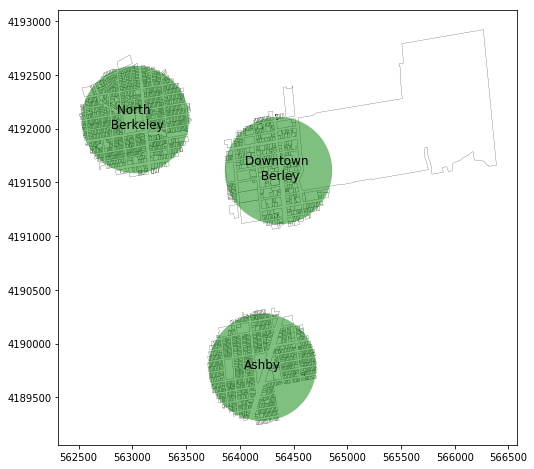

In [40]:
base = bart_parcels.plot(color='white', edgecolor='black', linewidth=.2)
bart_buffer_df.plot(ax=base, color='green', markersize = 5, alpha=.5)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=12)

**Question: do you think if we did the same thing with the overlay operation instead of spatial join, it would run just as fast? Or faster? Slower?  Why?**

### Getting Centroids of Parcels and Adding them to the GeoDataFrame, Setting the Geometry Column

In [41]:
parcels_proj['centroid'] = parcels_proj.centroid
parcels_proj = parcels_proj.set_geometry('centroid')
print(parcels_proj.geometry.name)
parcels_proj.head()

centroid


,city,state,lotsqft,zip,streetname,x_min,condo,longitude,y_max,streetnum,...,streetsufx,unit,usedscrp,shape_star,bldgarea,y_min,parcelid,x_max,geometry,centroid
index_left,,,,,,,,,,,,,,,,,,,,,
0,BERKELEY,CA,2925.0,94703,CALIFORNIA,563724.9312,NO,-122.275596,4.188983e+06,3408.0,...,ST,,DOUBLE OR DUPLEX TYPE- 2U,274.451904,2320.0,4.188962e+06,052 143600102,563743.0167,"POLYGON ((563743.0167004069 4188964.865184802,...",POINT (563733.9490707917 4188972.461243896)
1,BERKELEY,CA,3000.0,94703,CALIFORNIA,563758.6227,NO,-122.275217,4.188988e+06,3409.0,...,ST,,SINGLE FAMILY RESIDENTIAL,243.980469,1678.0,4.188969e+06,052 143501200,563776.0498,"POLYGON ((563776.049800408 4188972.073784799, ...",POINT (563767.2550927883 4188978.535165398)
2,BERKELEY,CA,6750.0,94703,SIXTY-SECOND,563706.4447,NO,-122.275786,4.189002e+06,1536.0,...,ST,,DOUBLE OR DUPLEX TYPE- 2U,595.060059,1885.0,4.188960e+06,052 143600200,563727.8409,"POLYGON ((563724.9312004079 4188980.0040848, 5...",POINT (563717.1421787504 4188980.67307758)
3,BERKELEY,CA,3825.0,94703,CALIFORNIA,563721.1548,NO,-122.275633,4.189004e+06,3400.0,...,ST,,FOURPLEX OR TRIPLEX W/SFR,332.613281,2640.0,4.188980e+06,052 143600101,563739.9508,"POLYGON ((563739.9508004077 4188982.6154848, 5...",POINT (563730.5227430228 4188992.082673961)
4,BERKELEY,CA,3750.0,94703,SIXTY-SECOND,563754.9907,NO,-122.275250,4.189010e+06,1600.0,...,ST,,SINGLE FAMILY RESIDENTIAL,335.715088,1694.0,4.188985e+06,052 143501300,563773.4997,"POLYGON ((563773.4997004068 4188987.627584798,...",POINT (563764.2318183609 4188997.545876422)


## Distance Calculations - Vandalism Proximity to BART Stations

Below we use a lamda function to compute the nearest distance of each vandalism case to each of the 3 BART stations, storing the distance to the nearest BART station as a new column in the vandalism GeoDataFrame.

In [42]:
geovandalism_proj['min_dist_to_bart'] = geovandalism_proj.geometry.apply(lambda g: bart_berkeley.distance(g).min())

And now we can plot the vandalism points using a color-ramp scaled by the minimum distance to a BART station.

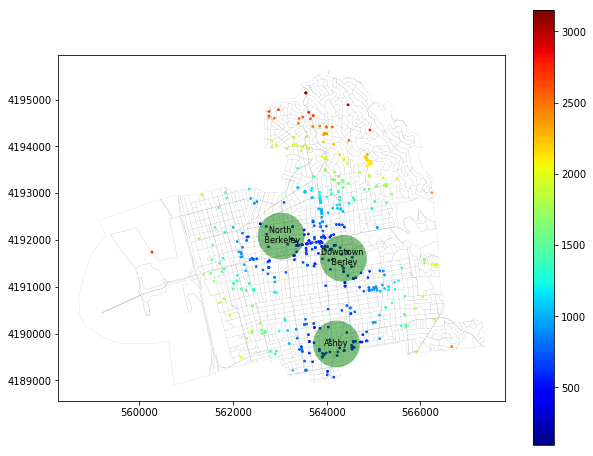

In [43]:
base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
geovandalism_proj.plot(ax=base, column='min_dist_to_bart', cmap='jet', markersize=3, legend=True)
bart_buffer_df.plot(ax=base, color='green', markersize = 5, alpha=.5)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=8)

## Proximity to BART Stations from Parcels

This is mainly a stress-test to see how well GeoPandas handles larger queries like getting the distance of each parcel in Berkeley to its nearest BART station.

In [44]:
parcels_proj['min_dist_to_bart'] = parcels_proj.geometry.apply(lambda g: bart_berkeley.distance(g).min())

Warning, the map is going to be slow.  Lots of detail.

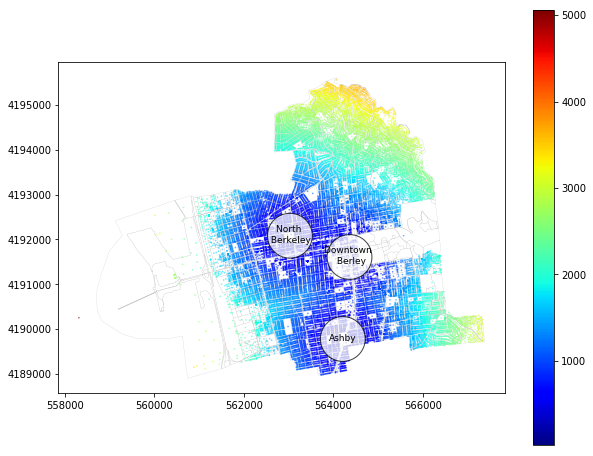

In [45]:
base = base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
parcels_proj.plot(ax=base, column='min_dist_to_bart', cmap='jet', marker='o', markersize=.5, alpha=.5, legend=True)
bart_buffer_df.plot(ax=base, color='white', edgecolor='black', markersize = 5, alpha=.75)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=9)

### Getting GeoJson data from an API


In [46]:
from geojson import Feature, Point, FeatureCollection

In [47]:
# If the cell above gives an error then geojson is not installed. 
# Uncomment and run the following line and run the import again
#!pip install geojson

First, lets retrieve calls to the Berkeley police department from the API endpoint that provides access to a GeoJson result. https://data.cityofberkeley.info/resource/s24d-wsnp.geojson

In [48]:
import json
import requests
import pprint
pp = pprint.PrettyPrinter()
endpoint_url = 'https://data.cityofberkeley.info/resource/s24d-wsnp.geojson'
response = requests.get(endpoint_url)
result = response.text
result


'{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":null,"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2018-04-13T00:00:00.000",":@computed_region_5s6d_2f32":null,"block_location_zip":null,"state":"CA","cvdow":"5",":@computed_region_x3q3_gi3e":null,"eventtm":"13:58","blkaddr":"1400 M L KING JR WAY","block_location_address":"1400 M L KING JR WAY","block_location_city":"Berkeley",":@computed_region_3ini_iehf":null,"offense":"THEFT MISD. (UNDER $950)","indbdate":"2018-10-22T03:30:13.000","cvlegend":"LARCENY","caseno":"18021394",":@computed_region_5bih_7r3y":null}},{"type":"Feature","geometry":null,"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2018-07-23T00:00:00.000",":@computed_region_5s6d_2f32":null,"block_location_zip":null,"state":"CA","cvdow":"1",":@computed_region_x3q3_gi3e":null,"eventtm":"19:01","blkaddr":"1500 M L KING JR WAY","block_location_address":"1500 M L KING JR WAY","block_location_city":"Berkeley",":

Now let's look at these data using pprint to understand its structure better.

In [49]:
data = json.loads(result)
calls = data['features']
pp.pprint(calls[0])

{'geometry': None,
 'properties': {':@computed_region_3ini_iehf': None,
                ':@computed_region_5bih_7r3y': None,
                ':@computed_region_5s6d_2f32': None,
                ':@computed_region_x3q3_gi3e': None,
                'blkaddr': '1400 M L KING JR WAY',
                'block_location_address': '1400 M L KING JR WAY',
                'block_location_city': 'Berkeley',
                'block_location_state': 'CA',
                'block_location_zip': None,
                'caseno': '18021394',
                'city': 'Berkeley',
                'cvdow': '5',
                'cvlegend': 'LARCENY',
                'eventdt': '2018-04-13T00:00:00.000',
                'eventtm': '13:58',
                'indbdate': '2018-10-22T03:30:13.000',
                'offense': 'THEFT MISD. (UNDER $950)',
                'state': 'CA'},
 'type': 'Feature'}


Below we import geojson methods, create a FeatureCollection object from calls, use that to create a GeoDataFrame from the features inside the collection, and then exclude rows with no location information.

**NOTE: This cell won't run unless geojson is installed**

In [50]:
from geojson import Feature, Point, FeatureCollection

collection = FeatureCollection(calls)
calls2 = gpd.GeoDataFrame.from_features(collection['features'])
calls2 = calls2[calls2.geometry.isnull()==False]

In [51]:
calls2.head()

,:@computed_region_3ini_iehf,:@computed_region_5bih_7r3y,:@computed_region_5s6d_2f32,:@computed_region_x3q3_gi3e,blkaddr,block_location_address,block_location_city,block_location_state,block_location_zip,caseno,city,cvdow,cvlegend,eventdt,eventtm,geometry,indbdate,offense,state
3,7,8,1501,3,1200 WALNUT ST,1200 WALNUT ST,Berkeley,CA,None,18019975,Berkeley,5,BURGLARY - VEHICLE,2018-04-06T00:00:00.000,22:00,POINT (-122.268753 37.885413),2018-10-22T03:30:13.000,BURGLARY AUTO,CA
4,10,32,1496,1,2000 ADDISON ST,2000 ADDISON ST,Berkeley,CA,None,18027086,Berkeley,5,ROBBERY,2018-05-11T00:00:00.000,16:30,POINT (-122.270635 37.870867),2018-10-22T03:30:19.000,ROBBERY,CA
5,1,10,1500,4,600 HILLDALE AVE,600 HILLDALE AVE,Berkeley,CA,None,18048575,Berkeley,6,LARCENY,2018-08-18T00:00:00.000,16:15,POINT (-122.265733 37.899985),2018-10-22T03:30:16.000,THEFT MISD. (UNDER $950),CA
6,12,18,1496,2,2400 TELEGRAPH AVE,2400 TELEGRAPH AVE,Berkeley,CA,None,18090916,Berkeley,2,LARCENY,2018-06-05T00:00:00.000,17:45,POINT (-122.258779 37.866761),2018-10-22T03:30:19.000,THEFT MISD. (UNDER $950),CA
7,14,20,1496,7,2200 DWIGHT WAY,2200 DWIGHT WAY,Berkeley,CA,None,18030302,Berkeley,0,MOTOR VEHICLE THEFT,2018-05-27T00:00:00.000,22:30,POINT (-122.265263 37.864238),2018-10-22T03:30:19.000,VEHICLE STOLEN,CA


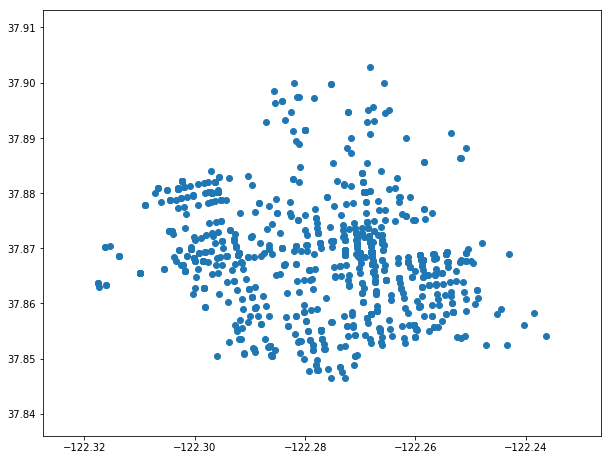

In [52]:
calls2.plot();

In [53]:
calls2.crs = {'init' :'epsg:4326'}
calls2.crs

{'init': 'epsg:4326'}

In [54]:
calls2.crs

{'init': 'epsg:4326'}

In [55]:
calls2 = calls2.to_crs(mtc_crs)

In [56]:
calls_proj = calls2.to_crs(mtc_crs)

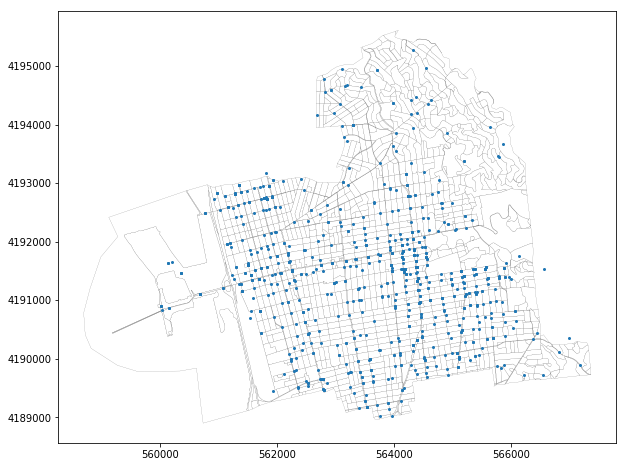

In [57]:
base = blocks_proj.plot(color='white', edgecolor='black', linewidth=.1)
calls_proj.plot(ax=base, markersize=4);

Notice the two points that fall outside the city, especially the one to the south?  Annoying - lets get rid of those.

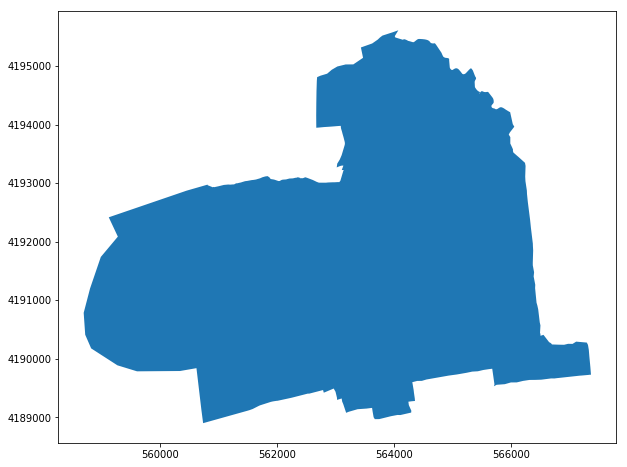

In [58]:
city = blocks_proj.dissolve(by='countyfp10')
city.plot()

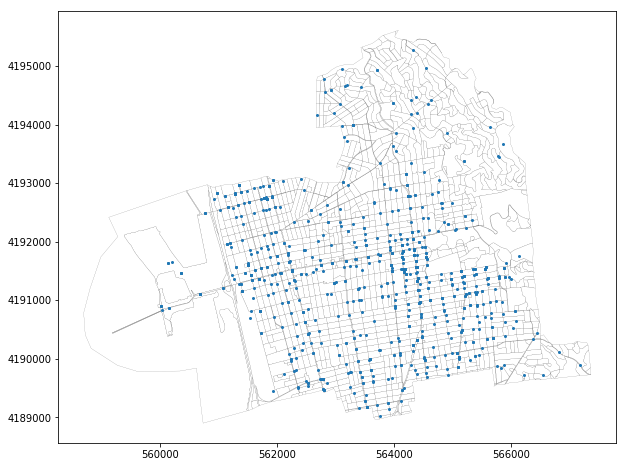

In [59]:
calls_proj2 = gpd.sjoin(calls_proj, city, how='inner')
base = blocks_proj.plot(color='white', edgecolor='black', linewidth=.1)
calls_proj2.plot(ax=base, markersize=4);

**And now we write the new point file as a shapefile**

In [60]:
calls_proj2.to_file('data/calls_proj2.shp')

### Your turn

OK, now you have access to several methods in geopandas:

* Reading and writing geojson and converting to GeoDataFrames
* Reading and writing shapefules and converting to GeoDataFrames
* Setting and changing coordinate reference systems
* Buffering
* Spatial joins with different options
* Overlays with different options
* Distance calculations

That's a pretty powerful toolkit to work with.  Time to practice.

Get two datasets of your choice - preferably a polygon and a point file, and practice these processing steps, and ask questions if you need any help.